In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score


df = pd.read_csv("../../Data/CleanData_mileage_price_enginesize.csv")

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Aygo,2017,9250,Manual,4414,Other,150,68.9,1.0
1,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0
2,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0
3,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0
4,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0


In [2]:
#https://towardsdatascience.com/multiple-linear-regression-model-using-python-machine-learning-d00c78f1172a
status = pd.get_dummies(df['model'])
status

,Aygo,Fiesta,Focus,Yaris
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
14228,0,0,1,0
14229,0,0,1,0
14230,0,0,1,0
14231,0,0,1,0


In [3]:
status = pd.get_dummies(df['model'], drop_first = True)
status

,Fiesta,Focus,Yaris
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
14228,0,1,0
14229,0,1,0
14230,0,1,0
14231,0,1,0


In [4]:
df2 = pd.concat([df, status], axis = 1)

df2.drop(['model'], axis = 1, inplace = True)

df2

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Fiesta,Focus,Yaris
0,2017,9250,Manual,4414,Other,150,68.9,1.0,0,0,0
1,2017,7100,Manual,32351,Petrol,0,68.9,1.0,0,0,0
2,2016,6500,Manual,26193,Petrol,0,69.0,1.0,0,0,0
3,2017,7650,Manual,12134,Petrol,0,68.9,1.0,0,0,0
4,2016,6999,Manual,21123,Petrol,0,69.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14228,2018,14000,Manual,8724,Diesel,145,74.3,1.5,0,1,0
14229,2017,18500,Manual,10960,Petrol,145,41.5,2.0,0,1,0
14230,2017,11000,Manual,17339,Petrol,145,60.1,1.0,0,1,0
14231,2016,16000,Manual,19834,Petrol,200,41.5,2.0,0,1,0


In [5]:
statusb = pd.get_dummies(df2['transmission'])
statusb

,Automatic,Manual,Other,Semi-Auto
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
14228,0,1,0,0
14229,0,1,0,0
14230,0,1,0,0
14231,0,1,0,0


In [6]:
statusb = pd.get_dummies(df2['transmission'], drop_first = True)
statusb

,Manual,Other,Semi-Auto
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
14228,1,0,0
14229,1,0,0
14230,1,0,0
14231,1,0,0


In [7]:
df3 = pd.concat([df2, statusb], axis = 1)

df3.drop(['transmission'], axis = 1, inplace = True)

df3

,year,price,mileage,fuelType,tax,mpg,engineSize,Fiesta,Focus,Yaris,Manual,Other,Semi-Auto
0,2017,9250,4414,Other,150,68.9,1.0,0,0,0,1,0,0
1,2017,7100,32351,Petrol,0,68.9,1.0,0,0,0,1,0,0
2,2016,6500,26193,Petrol,0,69.0,1.0,0,0,0,1,0,0
3,2017,7650,12134,Petrol,0,68.9,1.0,0,0,0,1,0,0
4,2016,6999,21123,Petrol,0,69.0,1.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14228,2018,14000,8724,Diesel,145,74.3,1.5,0,1,0,1,0,0
14229,2017,18500,10960,Petrol,145,41.5,2.0,0,1,0,1,0,0
14230,2017,11000,17339,Petrol,145,60.1,1.0,0,1,0,1,0,0
14231,2016,16000,19834,Petrol,200,41.5,2.0,0,1,0,1,0,0


In [8]:
statusc = pd.get_dummies(df3['fuelType'])
statusc

,Diesel,Hybrid,Other,Petrol
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
14228,1,0,0,0
14229,0,0,0,1
14230,0,0,0,1
14231,0,0,0,1


In [9]:
statusc = pd.get_dummies(df3['fuelType'], drop_first = True)
statusc

,Hybrid,Other,Petrol
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
14228,0,0,0
14229,0,0,1
14230,0,0,1
14231,0,0,1


In [10]:
df4 = pd.concat([df3, statusc], axis = 1)

df4.drop(['fuelType'], axis = 1, inplace = True)

df4

duplicated_columns_list = []
list_of_all_columns = list(df4.columns)
for column in list_of_all_columns:
    if list_of_all_columns.count(column) > 1 and not column in duplicated_columns_list:
        duplicated_columns_list.append(column)
duplicated_columns_list

for column in duplicated_columns_list:
    list_of_all_columns[list_of_all_columns.index(column)] = column + '_1'
    list_of_all_columns[list_of_all_columns.index(column)] = column + '_2'
df4.columns = list_of_all_columns
df4

,year,price,mileage,tax,mpg,engineSize,Fiesta,Focus,Yaris,Manual,Other_1,Semi-Auto,Hybrid,Other_2,Petrol
0,2017,9250,4414,150,68.9,1.0,0,0,0,1,0,0,0,1,0
1,2017,7100,32351,0,68.9,1.0,0,0,0,1,0,0,0,0,1
2,2016,6500,26193,0,69.0,1.0,0,0,0,1,0,0,0,0,1
3,2017,7650,12134,0,68.9,1.0,0,0,0,1,0,0,0,0,1
4,2016,6999,21123,0,69.0,1.0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14228,2018,14000,8724,145,74.3,1.5,0,1,0,1,0,0,0,0,0
14229,2017,18500,10960,145,41.5,2.0,0,1,0,1,0,0,0,0,1
14230,2017,11000,17339,145,60.1,1.0,0,1,0,1,0,0,0,0,1
14231,2016,16000,19834,200,41.5,2.0,0,1,0,1,0,0,0,0,1


In [11]:


# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df4, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:

scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['year', 'mileage',"price", 'tax', 'mpg','engineSize']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])



C:\Users\samslomowitz\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [13]:
df_train

,year,price,mileage,tax,mpg,engineSize,Fiesta,Focus,Yaris,Manual,Other_1,Semi-Auto,Hybrid,Other_2,Petrol
34,0.714286,0.212723,0.107250,0.547170,0.408922,0.000000,0,0,0,1,0,0,0,0,1
3137,0.857143,0.411358,0.059061,0.547170,0.249071,0.384615,0,0,1,0,0,0,0,0,1
3463,0.857143,0.320998,0.102549,0.547170,0.249071,0.384615,0,0,1,1,0,0,0,0,1
10800,0.571429,0.576336,0.270654,0.547170,0.130112,0.769231,0,1,0,1,0,0,0,0,1
11675,0.714286,0.382746,0.407545,0.547170,0.739777,0.384615,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,0.857143,0.448406,0.167917,0.547170,0.453532,0.000000,0,1,0,1,0,0,0,0,1
8039,0.571429,0.326173,0.327253,0.000000,0.431227,0.000000,1,0,0,0,0,1,0,0,1
14147,0.285714,0.260773,0.376058,0.075472,0.475836,0.000000,0,1,0,1,0,0,0,0,1
6936,0.857143,0.478193,0.000239,0.547170,0.453532,0.000000,1,0,0,1,0,0,0,0,1


In [14]:
# Dividing the training data set into X and Y
y_train = df_train.pop('price')
X_train = df_train

In [15]:
#Build a linear model


X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()



C:\Users\samslomowitz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     2895.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:37:40   Log-Likelihood:                 12839.
No. Observations:                9963   AIC:                        -2.565e+04
Df Residuals:                    9948   BIC:                        -2.554e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0267      0.010      2.643      0.008       0.007       0.047
year           0.3705      0.005     73.773      0.000       0.361       0.380
mileage       -0.1621      0.004    -37.324      0.000      -0.171      -0.154
tax           -0.0567      0.004    -14.082      0.000      -0.065      -0.049
mpg           -0.0595      0.008     -7.155      0.000      -0.076      -0.043
engineSize     0.2492      0.006     42.091      0.000       0.238       0.261
Fiesta         0.1080      0.002     48.144      0.000       0.104       0.112
Focus          0.2032      0.003     76.347      0.000       0.198       0.208
Yaris          0.0157      0.003      4.966      0.000       0.010       0.022
Manual        -0.0446      0.003    -14.722      0.000      -0.050      -0.039
Other_1        0.0732      0.067      1.095      0.274      -0.058       0.204
Semi-Auto     -0.0216      0.004     -4.928      0.000      -0.030      -0.013
Hybrid         0.1597      0.005     29.389      0.000       0.149       0.170
Other_2        0.0931      0.011      8.618      0.000       0.072       0.114
Petrol         0.0642      0.005     13.632      0.000       0.055       0.073
==============================================================================
Omnibus:                      884.495   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1814.861
Skew:                           0.584   Prob(JB):                         0.00
Kurtosis:                       4.734   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


In [18]:
vif

,Features,VIF
0,year,18.84
8,Manual,17.45
3,mpg,14.34
13,Petrol,11.75
2,tax,7.58
1,mileage,5.84
5,Fiesta,4.28
6,Focus,3.74
7,Yaris,3.10
4,engineSize,2.93


In [19]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('Other_1', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     3117.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:37:40   Log-Likelihood:                 12839.
No. Observations:                9963   AIC:                        -2.565e+04
Df Residuals:                    9949   BIC:                        -2.555e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0268      0.010      2.654      0.0

C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_24396/482853278.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X_train.drop('Other_1', 1,)
C:\Users\samslomowitz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,18.84
8,Manual,17.45
3,mpg,14.34
12,Petrol,11.75
2,tax,7.58
1,mileage,5.84
5,Fiesta,4.28
6,Focus,3.74
7,Yaris,3.10
4,engineSize,2.93


In [21]:
# Dropping highly correlated variables and insignificant variables
X2 = X.drop('year', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X2)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1890.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:37:41   Log-Likelihood:                 10666.
No. Observations:                9963   AIC:                        -2.131e+04
Df Residuals:                    9950   BIC:                        -2.121e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3384      0.011     29.643      0.0

C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_24396/1528698351.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X2 = X.drop('year', 1,)
C:\Users\samslomowitz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Manual,17.32
11,Petrol,10.85
2,mpg,10.66
1,tax,4.97
0,mileage,4.43
4,Fiesta,4.20
5,Focus,3.49
6,Yaris,2.99
3,engineSize,2.92
9,Hybrid,2.41


In [23]:
# Dropping highly correlated variables and insignificant variables
X3 = X2.drop('Other_2', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X3)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_24396/3413525124.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X3 = X2.drop('Other_2', 1,)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2062.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:37:41   Log-Likelihood:                 10665.
No. Observations:                9963   AIC:                        -2.131e+04
Df Residuals:                    9951   BIC:                        -2.122e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3433      0.010     32.755      0.0

C:\Users\samslomowitz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Manual,16.90
10,Petrol,10.84
2,mpg,10.23
1,tax,4.89
0,mileage,4.42
4,Fiesta,4.19
5,Focus,3.48
6,Yaris,2.99
3,engineSize,2.92
9,Hybrid,2.35


In [25]:
# Dropping highly correlated variables and insignificant variables
X4 = X3.drop('Manual', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X4)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_24396/1574196482.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X4 = X3.drop('Manual', 1,)
C:\Users\samslomowitz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2236.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:37:41   Log-Likelihood:                 10616.
No. Observations:                9963   AIC:                        -2.121e+04
Df Residuals:                    9952   BIC:                        -2.113e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3378      0.011     32.116      0.0

In [26]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Petrol,7.80
2,mpg,6.66
1,tax,4.88
0,mileage,4.40
4,Fiesta,4.13
5,Focus,3.44
6,Yaris,2.99
3,engineSize,2.76
8,Hybrid,1.85
7,Semi-Auto,1.06


In [27]:
# Dropping highly correlated variables and insignificant variables
X5 = X4.drop('Petrol', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X5)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2475.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:37:41   Log-Likelihood:                 10602.
No. Observations:                9963   AIC:                        -2.118e+04
Df Residuals:                    9953   BIC:                        -2.111e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2884      0.005     55.797      0.0

C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_24396/470672655.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X5 = X4.drop('Petrol', 1,)
C:\Users\samslomowitz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,mpg,6.53
0,mileage,4.02
4,Fiesta,3.54
1,tax,3.33
5,Focus,3.26
6,Yaris,2.37
3,engineSize,2.17
8,Hybrid,1.59
7,Semi-Auto,1.05


In [29]:
# Dropping highly correlated variables and insignificant variables
X6 = X5.drop('Semi-Auto', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X6)

lr_2 = sm.OLS(y_train, X_train_lm).fit()



C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_24396/3052523471.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X6 = X5.drop('Semi-Auto', 1,)
C:\Users\samslomowitz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2784.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:37:41   Log-Likelihood:                 10601.
No. Observations:                9963   AIC:                        -2.118e+04
Df Residuals:                    9954   BIC:                        -2.112e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2877      0.005     56.809      0.0

In [31]:
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


In [32]:
vif

,Features,VIF
2,mpg,6.52
0,mileage,4.00
4,Fiesta,3.54
1,tax,3.29
5,Focus,3.26
6,Yaris,2.37
3,engineSize,2.17
7,Hybrid,1.59


C:\Users\samslomowitz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

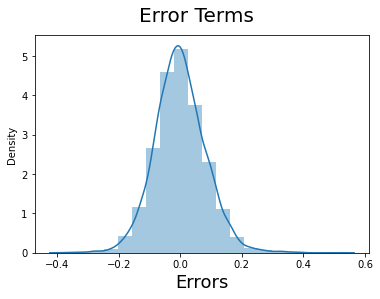

In [33]:
y_train_price = lr_2.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

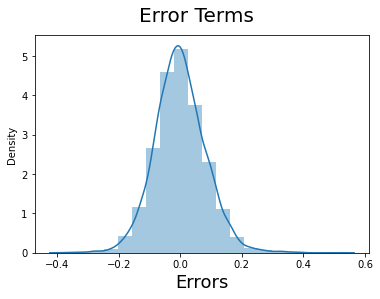

In [34]:
fig

In [35]:
scaler = MinMaxScaler()

num_vars = ['year', 'mileage', "price",'tax', 'mpg','engineSize']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test

C:\Users\samslomowitz\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,year,price,mileage,tax,mpg,engineSize,Fiesta,Focus,Yaris,Manual,Other_1,Semi-Auto,Hybrid,Other_2,Petrol
8902,0.428571,0.191621,0.526750,0.531915,0.368030,0.153846,1,0,0,1,0,0,0,0,1
7895,0.428571,0.221609,0.257125,0.531915,0.368030,0.153846,1,0,0,1,0,0,0,0,1
13385,0.857143,0.503672,0.275832,0.617021,0.858736,0.384615,0,1,0,1,0,0,0,0,0
13961,0.571429,0.280716,0.556872,0.617021,0.739777,0.384615,0,1,0,1,0,0,0,0,0
7231,0.285714,0.183320,0.413438,0.000000,0.579926,0.000000,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,0.571429,0.295493,0.089571,0.638298,0.453532,0.384615,0,0,1,1,0,0,0,0,1
10110,0.571429,0.374071,0.211090,0.531915,0.314126,0.000000,0,1,0,0,0,1,0,0,1
2471,0.571429,0.417185,0.382851,0.000000,0.808550,0.384615,0,0,1,0,0,0,1,0,0
1557,0.428571,0.074275,0.688357,0.000000,0.641264,0.000000,0,0,0,1,0,0,0,0,1


In [36]:
df_test

,year,price,mileage,tax,mpg,engineSize,Fiesta,Focus,Yaris,Manual,Other_1,Semi-Auto,Hybrid,Other_2,Petrol
8902,0.428571,0.191621,0.526750,0.531915,0.368030,0.153846,1,0,0,1,0,0,0,0,1
7895,0.428571,0.221609,0.257125,0.531915,0.368030,0.153846,1,0,0,1,0,0,0,0,1
13385,0.857143,0.503672,0.275832,0.617021,0.858736,0.384615,0,1,0,1,0,0,0,0,0
13961,0.571429,0.280716,0.556872,0.617021,0.739777,0.384615,0,1,0,1,0,0,0,0,0
7231,0.285714,0.183320,0.413438,0.000000,0.579926,0.000000,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,0.571429,0.295493,0.089571,0.638298,0.453532,0.384615,0,0,1,1,0,0,0,0,1
10110,0.571429,0.374071,0.211090,0.531915,0.314126,0.000000,0,1,0,0,0,1,0,0,1
2471,0.571429,0.417185,0.382851,0.000000,0.808550,0.384615,0,0,1,0,0,0,1,0,0
1557,0.428571,0.074275,0.688357,0.000000,0.641264,0.000000,0,0,0,1,0,0,0,0,1


In [37]:
y_test = df_test.pop('price')
X_test = df_test

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m4 = X_test_m4.drop(["Other_1", "year", "Other_2","Manual","Petrol","Semi-Auto"], axis = 1)

# Making predictions using the final model
y_pred_m4 = lr_2.predict(X_test_m4)

C:\Users\samslomowitz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [38]:

r2_score(y_true = y_test, y_pred = y_pred_m4)

0.6973504780280277

In [39]:
df4.describe()

,year,price,mileage,tax,mpg,engineSize,Fiesta,Focus,Yaris,Manual,Other_1,Semi-Auto,Hybrid,Other_2,Petrol
count,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000,14233.000000
mean,2017.161877,11139.578304,18815.396684,102.344551,61.492391,1.199129,0.433359,0.293262,0.141151,0.859130,0.000070,0.042577,0.037589,0.004707,0.837350
std,1.530949,3432.803084,12428.901613,64.191562,9.063270,0.286962,0.495556,0.455274,0.348189,0.347899,0.008382,0.201909,0.190206,0.068451,0.369059
min,2013.000000,3891.000000,1.000000,0.000000,34.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,8695.000000,9283.000000,20.000000,56.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2017.000000,10498.000000,16222.000000,145.000000,60.100000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2018.000000,12995.000000,26533.000000,145.000000,65.700000,1.500000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2020.000000,26995.000000,58500.000000,265.000000,88.300000,2.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


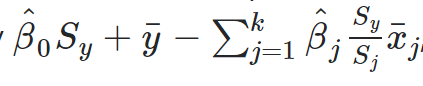

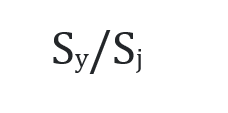

In [40]:
#https://stats.stackexchange.com/questions/74622/converting-standardized-betas-back-to-original-variables

#mileage
mile = (-.3399*(3432.80/12428.90)*18815.40)

In [41]:
#tax

tax = (.1028*(3432.80/64.19)*102.34)

In [42]:
#mpg

mpg = (-.0941*(3432.80/9.06)*61.49)

In [43]:
#engineSize
ES = (.1496*(3432.80/.2870)*1.20)

In [44]:
summ = mile + tax + mpg + ES

In [45]:
intercept = ((.2877*3431.80)+11139.58 - summ)


In [46]:
intercept

13375.786488680384

In [47]:
mile_coeff = (-.3399*(3432.80/12428.90))

In [48]:
mile_coeff

-0.09387867952916187

In [49]:
tax_coeff =(.1028*(3432.80/64.19))

In [50]:
tax_coeff

5.497613958560525

In [51]:
mpg_coeff =(-.0941*(3432.80/9.06))

In [52]:
mpg_coeff

-35.65413686534217

In [53]:
ES_coeff =(.1496*(3432.80/.2870))

In [54]:
ES_coeff

1789.3619512195125

In [55]:
fiesta_coeff =(.1008)

In [56]:
fiesta_coeff

0.1008

In [57]:
focus_coeff =(.2107)

In [58]:
focus_coeff

0.2107

In [59]:
yaris_coeff = (.0413)

In [60]:
yaris_coeff

0.0413

In [61]:
hybrid_coeff = (.1619)

In [62]:
hybrid_coeff

0.1619

In [63]:
y = intercept  + mile_coeff*10000 + tax_coeff*125 + mpg_coeff*58 + ES_coeff*1.5 + fiesta_coeff*1 + focus_coeff*0 + yaris_coeff*0 + hybrid_coeff*1

In [64]:
y = "{:,.2f}".format(y)

print(f"Your car is valued at £{y}")

Your car is valued at £13,740.57
